<h3>Kaggle Comptetion : Predicting Optimal Fertilizer</h3>
Description:<br>
Your Goal: Your objective is to select the best fertilizer for different weather, soil conditions and crops.<br>
Submissions are evaluated according to the Mean Average Precision @ 3 (MAP@3)

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


In [34]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e6/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')

In [35]:
df_train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [36]:
df_test.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [38]:
df_train['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

In [39]:
df_train['Soil Type'].value_counts()

Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64

In [40]:
df_train['Crop Type'].value_counts()

Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64

In [41]:
df_train.isnull().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [42]:
df_test.isnull().sum()

id             0
Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64

In [43]:
df_train.duplicated().sum()

0

In [44]:
df_test.duplicated().sum()

0

In [45]:
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [46]:
# Encoding Categorical Features
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

df_train['Soil Type'] = le_soil.fit_transform(df_train['Soil Type'])
df_train['Crop Type'] = le_crop.fit_transform(df_train['Crop Type'])
df_train['Fertilizer Name'] = le_fert.fit_transform(df_train['Fertilizer Name'])

df_test['Soil Type'] = le_soil.fit_transform(df_test['Soil Type'])
df_test['Crop Type'] = le_crop.fit_transform(df_test['Crop Type'])

print(df_train.shape, df_test.shape)
df_train.head()

(750000, 10) (250000, 9)


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,1,8,36,4,5,4
1,1,27,69,65,4,4,30,6,18,4
2,2,29,63,32,4,4,24,12,16,2
3,3,35,62,54,4,0,39,12,4,0
4,4,35,58,43,3,6,37,2,16,5


In [47]:
X = df_train.drop(columns = ['Fertilizer Name', 'id'])
y = df_train['Fertilizer Name']

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [51]:
model_xgb = XGBClassifier(random_state=42, 
                          max_depth=7, min_child_weight=5, 
                          subsample=0.9598528437324805, colsample_bytree=0.7174250836504598, 
                          learning_rate=0.13982006857683707, n_estimators=271,
                          eval_metric='mlogloss', early_stopping_rounds=50) 

model_xgb.fit(X_train, y_train, 
              eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7174250836504598, device=None,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13982006857683707,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=271, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
y_val_xgb_proba = model_xgb.predict_proba(X_val)
y_val_xgb_pred_top3_idx = np.argsort(y_val_xgb_proba, axis=1)[:, -3:][:, ::-1]
y_val_xgb_pred_top3_label = le_fert.inverse_transform(y_val_xgb_pred_top3_idx.ravel()).reshape(y_val_xgb_pred_top3_idx.shape)
y_val_label = le_fert.inverse_transform(y_val)
xgb_pred_vs_real = np.column_stack((y_val_xgb_pred_top3_label, y_val_label))
print(xgb_pred_vs_real[:5]) 

[['14-35-14' 'Urea' '10-26-26' '20-20']
 ['10-26-26' '14-35-14' '28-28' '17-17-17']
 ['28-28' '17-17-17' '10-26-26' '20-20']
 ['DAP' '20-20' '10-26-26' '10-26-26']
 ['28-28' '17-17-17' '14-35-14' '28-28']]


In [56]:
# prediction accuracy
xgb_correct = [row[-1] in row[:3] for row in xgb_pred_vs_real]
xgb_accuracy = sum(xgb_correct) / len(xgb_correct)

print("XGB Accuracy:", xgb_accuracy)

XGB Accuracy: 0.5233333333333333


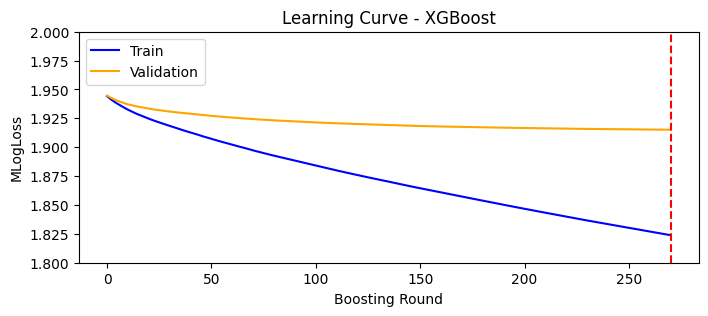

In [57]:
plt.figure(figsize=(8, 3))
plt.title('Learning Curve - XGBoost')
plt.xlabel('Boosting Round')
plt.ylabel('MLogLoss')

sns.lineplot(data=model_xgb.evals_result()['validation_0']['mlogloss'], 
             label='Train', color='blue')

sns.lineplot(data=model_xgb.evals_result()['validation_1']['mlogloss'], 
             label='Validation', color='orange')

plt.ylim(1.8, 2.0 if max(model_xgb.evals_result()['validation_1']['mlogloss']) > 2 else 2.0)
plt.axvline(model_xgb.best_iteration, color='red', linestyle='--')  
plt.legend()
plt.show()

In [62]:
#submission
test_proba = model_xgb.predict_proba(df_test.drop(columns = 'id'))

test_pred_top3_idx = np.argsort(test_proba, axis=1)[:, -3:][:, ::-1]
test_pred_top3_label = le_fert.inverse_transform(test_pred_top3_idx.ravel()).reshape(test_pred_top3_idx.shape)

submission = pd.DataFrame({
    'id': df_test['id'], 
    'Fertilizer Name': [' '.join(row) for row in test_pred_top3_label]
})

submission.to_csv('submission.csv', index=False)